<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC_Basic_Toy_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_%EA%B9%80%EC%8A%B9%EB%B9%88_%EC%98%A8%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 9.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 살펴보기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2022-04-21 ToyProjoect_BostonHousing/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
# 결측치 없음을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
LSTAT1       0
dtype: int64

In [ ]:
# 중복된 row가 없음을 확인
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

## 데이터 분포 확인하기
-  MEDV와 강한 상관관계를 갖는 feature는 "LSTAT", "RM", "CAT.MEDV" column 임을 확인
- CAT.MEDV와의 강한 상관관계는 당연하기 때문에, 대신 상관관계가 가장 낮은 'CHAS' Column을 조사  ;  
  상관관계가 낮아도 의미 있는 인사이트를 얻을 수 있지 않을까?

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


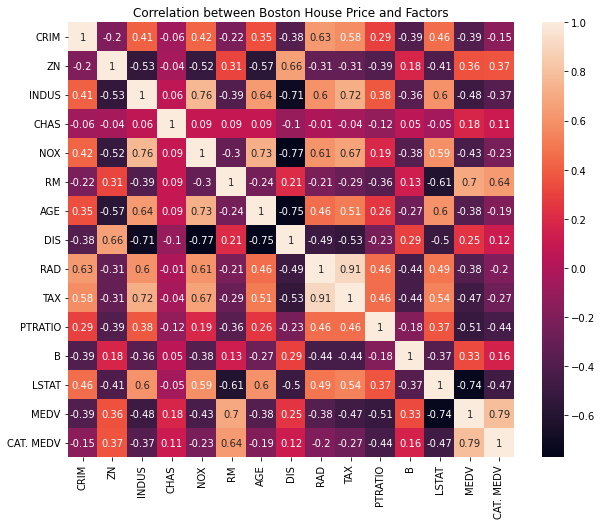

In [ ]:
# 시각화로 상관관계를 직관적으로 파악하기
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation between Boston House Price and Factors')
plt.show()

## 1) LSTAT


---

[CONCLUSION]
- Positive Skewed Distribution  
- Negative Correlation


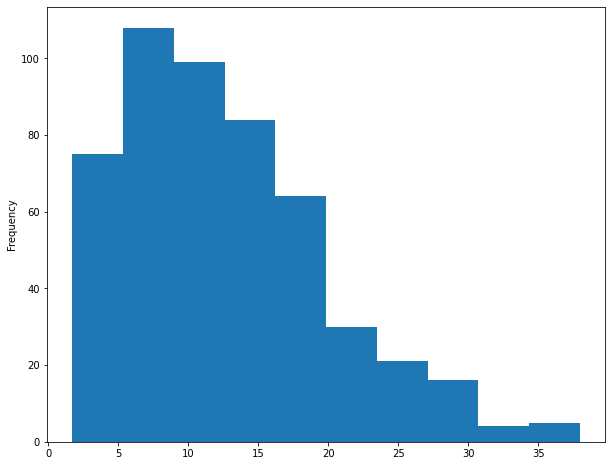

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
df['LSTAT'].plot.hist()

[Text(0, 0.5, 'ratio of lower class in Boston'),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for ratio of lower class')]

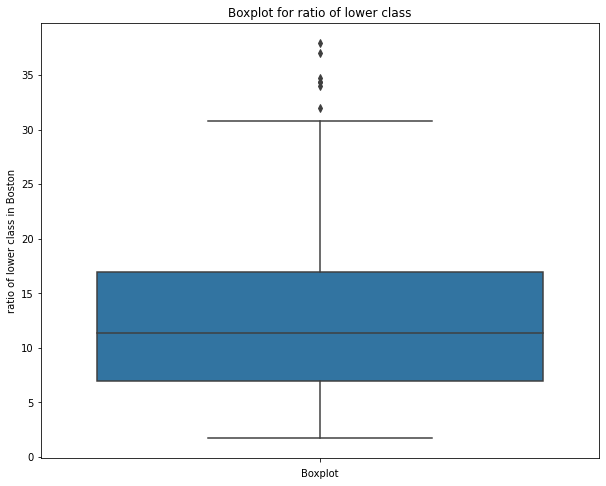

In [ ]:
# confirm outliers in LSTAT column
box = sns.boxplot(y = 'LSTAT', data = df)
box.set(ylabel = "ratio of lower class by town",
        xlabel = "Boxplot",
        title = "Boxplot for ratio of lower class")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency of lower class ratio by town'),
 Text(0.5, 0, 'lower class ratio by town'),
 Text(0.5, 1.0, 'Histogram for the lower class to towner ratio variable')]

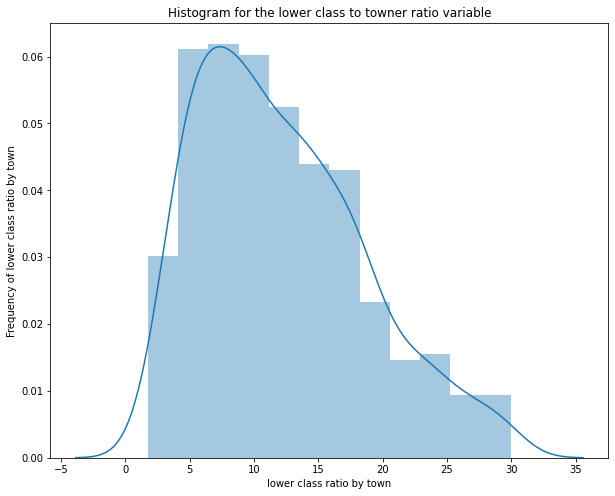

In [ ]:
# 30 이상은 이상치
under30 = df.loc[df['LSTAT'] < 30, 'LSTAT']
hisplot = sns.distplot(under30)
hisplot.set(xlabel = "lower class ratio by town",
            ylabel = 'Frequency of lower class ratio by town',
            title = 'Histogram for the lower class to towner ratio variable')

In [ ]:
def lstat(x):
  if  x <= 10 :
    return "fancy town"
  elif x <= 20:
    return "normal town"
  else:
    return "weak build quality"
df['LSTAT1'] = df['LSTAT'].map(lstat)

In [ ]:
# 음의 상관관계
import numpy as np

how = {
    'MEDV' : [np.mean, np.max, np.min]
}
df.groupby('LSTAT1').agg(how)

MEDV            
                         mean  amax  amin
LSTAT1                                   
fancy town          29.474429  50.0  11.9
normal town         18.923944  31.0   8.3
weak build quality  12.377027  23.7   5.0

[Text(0, 0.5, 'median value of houses '),
 Text(0.5, 0, 'lower class ratio'),
 Text(0.5, 1.0, 'Scatter Plot between LSAT and MEDV')]

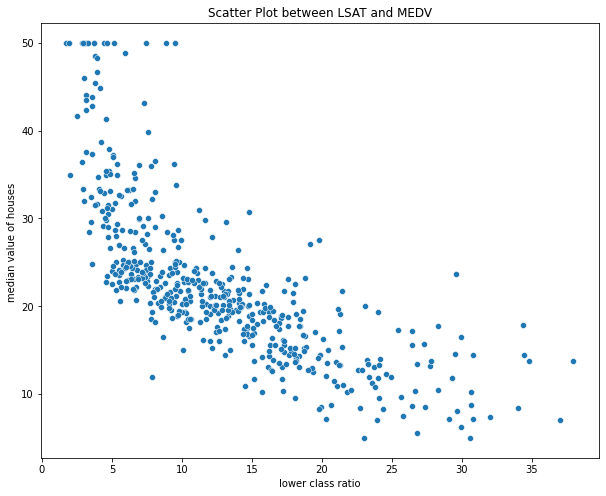

In [ ]:
# 음의 상관관계 시각화
scatter = sns.scatterplot(x="LSTAT", y="MEDV", data=df)
scatter.set(xlabel = "lower class ratio",
            ylabel = "median value of houses ",
            title = "Scatter Plot between LSAT and MEDV")

## 2) RM

---
[CONCLUSION]

- Nearly Normal Distribution
- Positive Correlation

[Text(0, 0.5, 'Number of rooms'),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for number of rooms')]

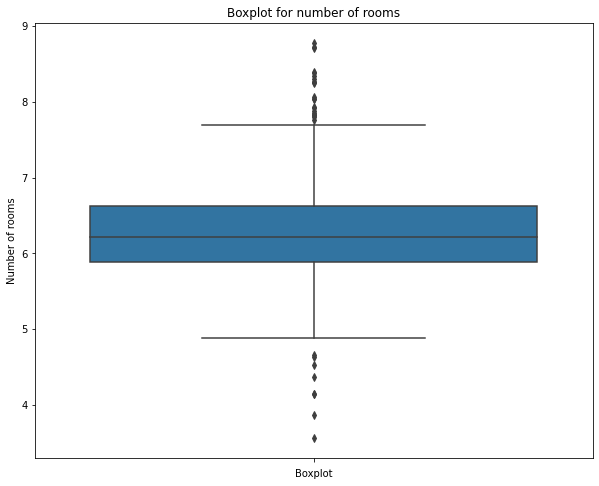

In [ ]:
box = sns.boxplot(y = 'RM', data = df)
box.set(ylabel = "Number of rooms",
        xlabel = "Boxplot",
        title = "Boxplot for number of rooms")

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 6.047 6.495 6.674 5.713 6.072 5.95  5.701 5.933 5.841 5.85
 5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03  5.399 5.602
 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927 5.741 6.456
 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961 6.065 6.245 6.273
 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167 6.389 6.63  6.015
 6.121 7.007 7.079 6.405 6.442 6.249 6.625 6.163 8.069 7.82  7.416 6.781
 6.137 5.851 5.836 6.127 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928
 6.176 6.021 5.872 5.731 5.87  5.856 5.879 5.986 5.613 5.693 6.431 5.637
 6.458 6.326 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019
 5.403 5.468 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709
 6.129 6.152 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101
 7.929 5.877 6.319 6.402 5.875 5.88  5.572 6.416 5.8

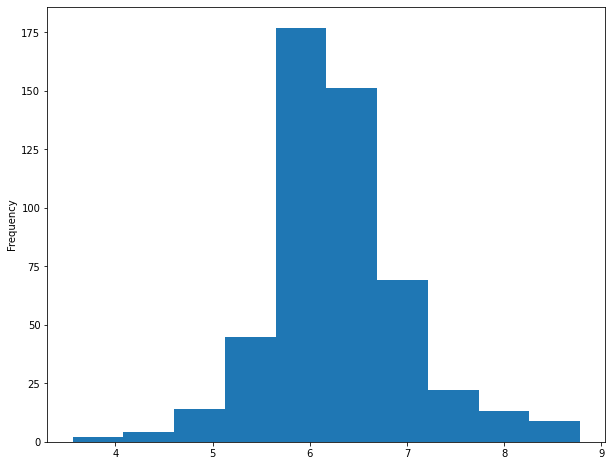

In [ ]:
# 방의 수가 5 미만인 집, 7 초과인 집의 비율은?
print(df['RM'].unique())
df['RM'].plot.hist()

In [ ]:
df.loc[df['RM'] > 8, 'RM']

97     8.069
163    8.375
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
364    8.780
Name: RM, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency of people who have large square footage'),
 Text(0.5, 0, 'Number of rooms'),
 Text(0.5, 1.0, 'Histogram for the RM variable')]

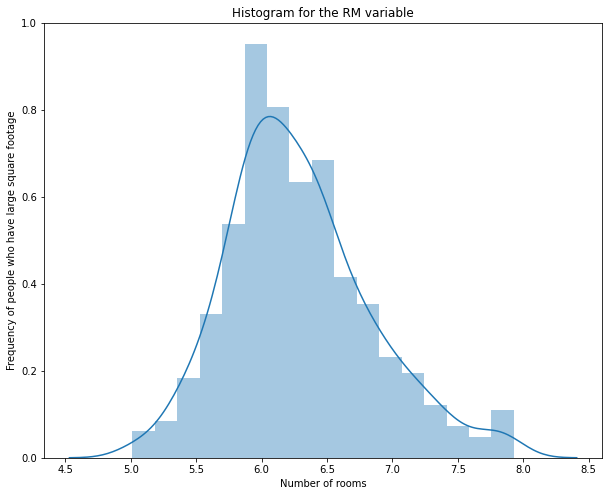

In [ ]:
# 5미만, 8초과는 이상치
# 이상치 제거

from5to7 = df.loc[(df['RM'] < 8) & (df['RM'] > 5) , 'RM']
hisplot = sns.distplot(from5to7)
hisplot.set(xlabel = "Number of rooms",
            ylabel = 'Frequency of people who have large square footage',
            title = 'Histogram for the RM variable')

In [ ]:
def rm(x):
  if  x < 6 :
    return "small square footage house"
  elif x < 7:
    return "normal"
  else:
    return "large square footage house"
df['RM1'] = df['RM'].map(rm)

In [ ]:
# 양의 상관관계
import numpy as np

how = {
    'MEDV' : [np.mean, np.max, np.min]
}
df.groupby('RM1').agg(how)

MEDV            
                                 mean  amax  amin
RM1                                              
large square footage house  38.396875  50.0  15.0
normal                      22.015985  50.0   7.2
small square footage house  17.467630  50.0   5.0

[Text(0, 0.5, 'median value of houses '),
 Text(0.5, 0, 'number of rooms'),
 Text(0.5, 1.0, 'Scatter Plot between RM and MEDV')]

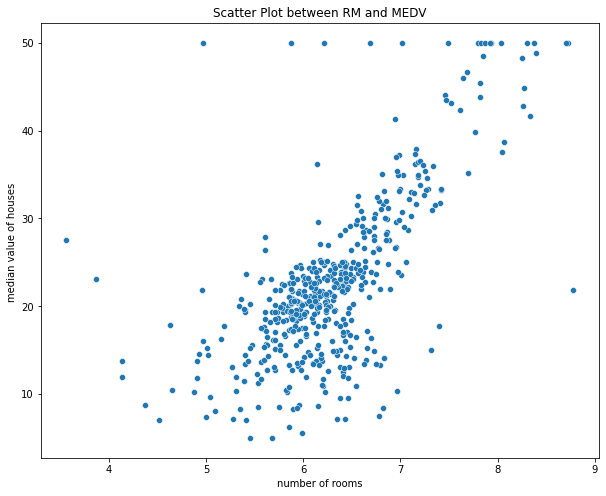

In [ ]:
# 양의 상관관계 시각화
scatter = sns.scatterplot(x="RM", y="MEDV", data=df)
scatter.set(xlabel = "number of rooms",
            ylabel = "median value of houses ",
            title = "Scatter Plot between RM and MEDV")

## 3) CHAS
---
[CONCLUSION]
- no correlation
- Average of median home cost in riverview is higher than other towns. 

In [ ]:
df['CHAS'].unique()

array([0, 1])

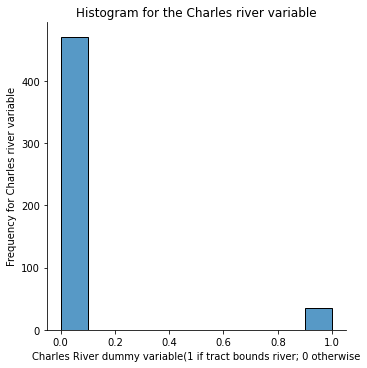

In [ ]:
displot = sns.displot(df['CHAS'])
displot.set(xlabel = "Charles River dummy variable(1 if tract bounds river; 0 otherwise",
            ylabel = "Frequency for Charles river variable",
            title = "Histogram for the Charles river variable")

In [ ]:
def chas(x):
  if  x == 1 :
    return "tract bounds river "
  else:
    return "far from the river "
df['CHAS1'] = df['CHAS'].map(chas)

In [ ]:
# 찰스 강과 가까울수록 집값의 평균이 높다
import numpy as np

how = {
    'MEDV' : [np.mean, np.max, np.min]
}
df.groupby('CHAS1').agg(how)

MEDV            
                          mean  amax  amin
CHAS1                                     
far from the river   22.093843  50.0   5.0
tract bounds river   28.440000  50.0  13.4

[Text(0, 0.5, 'median value of houses '),
 Text(0.5, 0, 'distance from the Charles river to house'),
 Text(0.5, 1.0, 'Scatter Plot between CHAS and MEDV')]

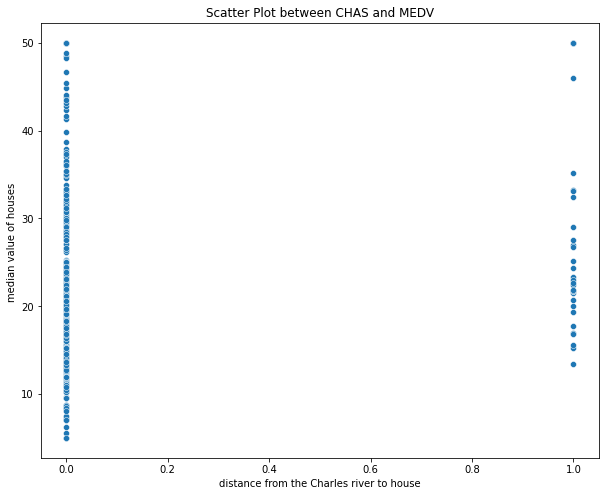

In [ ]:
# 상관관계는 없다
scatter = sns.scatterplot(x="CHAS", y="MEDV", data=df)
scatter.set(xlabel = "distance from the Charles river to house",
            ylabel = "median value of houses ",
            title = "Scatter Plot between CHAS and MEDV")

## T-test
---
**[ASSUMPTIONS]**
1. MEDV : dependent continuous variable + The dependent variable must follow a normal distribution
2. CHAS : independent, categorical variable with two levels + There is no relationship between the observations in each group
3. Homogeniety of variance
  
     
       
       


**[CONCLUSION]**  
Since the p-value is less than alpha value 0.05,  
there is a statistical difference in median value of houses bounded by the Charles river 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'draw histogram to check distribution')]

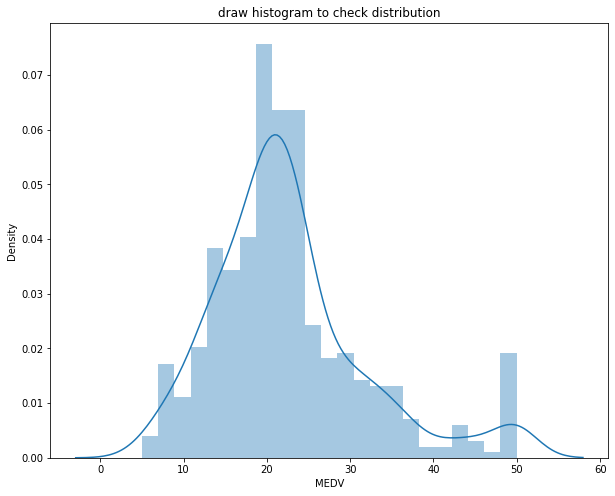

In [ ]:
hisplot = sns.distplot(df['MEDV'])
hisplot.set(title = "draw histogram to check distribution")

In [ ]:
# T-test
import scipy.stats

# Levene's Test : check test significance
scipy.stats.levene(df['MEDV'], df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

In [ ]:
scipy.stats.ttest_ind(df['MEDV'], df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

## Multivariate analysis 1 : DIS & AGE ---- MEDV




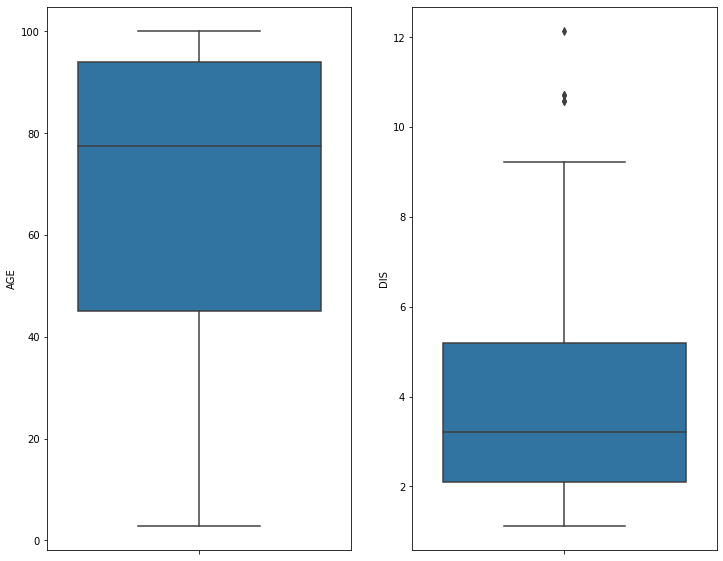

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 10))
ax = ax.flatten()
sns.boxplot(y='AGE', data = df, ax = ax[0])
sns.boxplot(y='DIS', data = df, ax = ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency of residential area near office'),
 Text(0.5, 0, 'Distance from workplace to town'),
 Text(0.5, 1.0, 'Histogram for the DIS variable')]

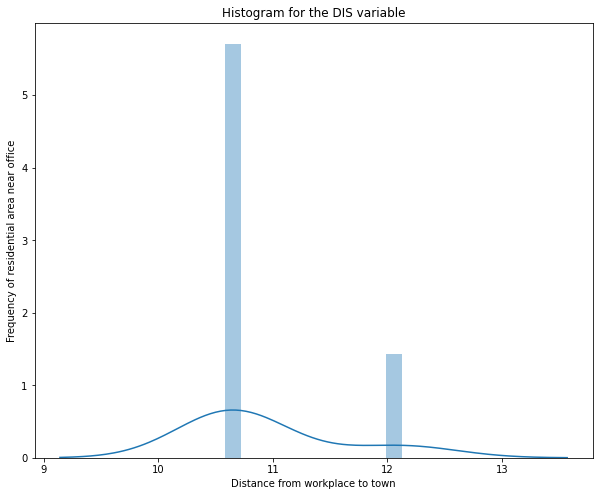

In [ ]:
# 이상치 제거하고 DIS 분포 확인
over10 = df.loc[df['DIS'] >= 10, 'DIS']
hisplot = sns.distplot(over10)
hisplot.set(xlabel = "Distance from workplace to town",
            ylabel = 'Frequency of residential area near office',
            title = 'Histogram for the DIS variable')


In [ ]:
# mapping
def dis(x):
  if  x <= 11 :
    return "near office"
  else:
    return "far from office"
df['DIS1'] = df['DIS'].map(dis)

In [ ]:
# AGE : one-way ANOVA를 적용하기 위해 연속형 변수를 범주형 데이터로 변환하기
df.loc[df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
df.loc[(df['AGE'] > 30) & (df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
df.loc[(df['AGE'] >= 70), 'Age_Group'] = "70 and older"
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,LSTAT1,RM1,CHAS1,Age_Group
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,fancy town,normal,far from the river,Between 35 and 70
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,fancy town,normal,far from the river,70 and older
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,fancy town,large square footage house,far from the river,Between 35 and 70
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,fancy town,normal,far from the river,Between 35 and 70
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,fancy town,large square footage house,far from the river,Between 35 and 70


In [ ]:
# Test for equality of variance
scipy.stats.levene(df[df['Age_Group'] == "35 and younger"]['MEDV'],
                   df[df['Age_Group'] == "Between 35 and 70"]['MEDV'],
                   df[df['Age_Group'] == "70 and older"]['MEDV'],
                   center = 'mean')

LeveneResult(statistic=1.9263167703439688, pvalue=0.14675700390882251)

In [ ]:
# binding
thirtyfive_lower = df[df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = df[df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = df[df['Age_Group'] == "70 and older"]['MEDV']

In [ ]:
# run a one-way ANOVA
# MEDV와 AGE_GROUP의 각 카테고리 간 통계적으로 유의미한 차이가 있다.
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

In [ ]:
# mapping
def age(x):
  if  x <= 35 :
    return "35 and younger"
  elif x <= 70:
    return "between 35 and 70"
  else:
    return "70 and older"
df['AGE1'] = df['AGE'].map(age)

In [ ]:
# aggregation
how = {
    'MEDV' : np.mean
}

df.groupby(['AGE1', 'DIS1']).agg(how)

MEDV
AGE1              DIS1                      
35 and younger    near office      27.775824
70 and older      near office      19.793380
between 35 and 70 far from office  30.100000
                  near office      24.907087

## Multivariate Analysis 2 : DIS & RM --- MEDV


In [ ]:
df.groupby(['DIS1', 'RM1']).agg(how)

MEDV
DIS1            RM1                                  
far from office normal                      30.100000
near office     large square footage house  38.396875
                normal                      21.985821
                small square footage house  17.467630

## Multivariate Analysis 3 : DIS, CHAS, LSTAT --- MEDV
---
[CONCLUSION]
1. 직장과 멀리 떨어진 지역은 찰스 강에서도 멀리 떨어져 있다.
2. 직장과 멀리 떨어진 지역은 부촌이다.
3. 직장과 가까운 지역의 경우, 찰스 강과 인접할수록 집값이 비싸다.

In [ ]:
# DIS1, RM1, LSTAT1, CHAS1, AGE1
df.groupby(['DIS1', 'CHAS1','LSTAT1']).agg(how)

MEDV
DIS1            CHAS1               LSTAT1                       
far from office far from the river  fancy town          30.100000
near office     far from the river  fancy town          28.794527
                                    normal town         18.828643
                                    weak build quality  12.021429
                tract bounds river  fancy town          37.476471
                                    normal town         20.278571
                                    weak build quality  18.600000

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>